In [1]:
import time
import typing
import warnings

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfinv
from scipy.stats import norm

In [2]:
xs = np.linspace(-5, 5, 10000)
warnings.filterwarnings("ignore", message="invalid value encountered in sqrt")

# Zadanie 2 - Generowanie rozkładu normalnego

Na listach zadań poznaliśmy kilka metod generowania rozkładu normalnego - nie są to jedyne metody znane i powszechnie używane metody. W pierwszym kroku sprawdź dotychczas zaimplementowane algorytmy, czy działają poprawnie.
W drugim kroku, zaimplementuj dwie dodatkowe metody generowania rozkładu normalnego:
- metodę Tuzina
- metodę Zigguratu używając rozkładu wykładniczego. Przetestuj ile razy musimy obliczać funkcję wykładniczą dla różnych wyborów schodków

Finalnie, porównaj efektywność generowania rozkładu normalnego za pomocą samodzielnie zaimplementowanych
metod. Rozważ zarówno czas wykonania algorytmu, jak i dokładność symulacji.

### Metoda 1 - Box - Muller

Metoda ta polega na przekształceniu dwóch niezależnych liczb losowych $ U_1 $ i $ U_2 $, które mają rozkład jednostajny na przedziale (0, 1), w dwie niezależne liczby losowe $ X $ i $ Y $ o rozkładzie normalnym ze średnią 0 i odchyleniem standardowym 1. Przekształcenie to jest opisane wzorami:

$$ X = \sqrt{-2 \ln U_1} \cos(2 \pi U_2) $$
$$ Y = \sqrt{-2 \ln U_1} \sin(2 \pi U_2) $$

Procedura krok po kroku wygląda następująco:

1. Wygeneruj dwie niezależne liczby losowe $ U_1 $ i $ U_2 $ z rozkładu jednostajnego na przedziale (0, 1).
2. Oblicz $X$ i $Y$ za pomocą powyższych wzorów.
3. Liczby $X$ i $Y$ są niezależne i mają rozkład normalny z zerową średnią i odchyleniem standardowym równym 1.


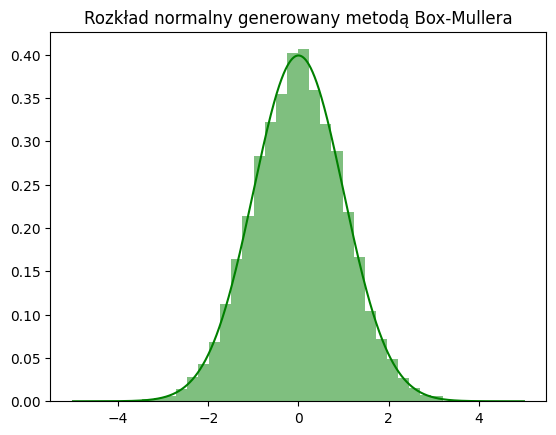

CPU times: total: 375 ms
Wall time: 743 ms


In [3]:
%%time


def box_muller(n: int = 10**3) -> typing.Tuple[np.ndarray, np.ndarray]:
    """Wygeneruj próbę z rozkładu normalnego standardowego za pomocą metody Boxa-Mullera.

    Parameters
    ----------
    n: int
        długość próby

    Returns:
    ----------
    array
        próba z rozkładu normalnego standardowego o długości n
    """

    u1 = np.random.uniform(0, 1, n)
    u2 = np.random.uniform(0, 1, n)

    x = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    y = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

    return x, y


plt.hist(box_muller(10000)[0], bins=30, density=True, alpha=0.5, color="g")
plt.plot(xs, norm.pdf(xs), color="g")
plt.title("Rozkład normalny generowany metodą Box-Mullera")
plt.show()

### Metoda 2 - Marsagli

Metoda Marsagliego, znana również jako metoda polarnego odrzucania polega na przekształceniu dwóch niezależnych liczb losowych $V_1$ i $V_2$, które mają rozkład jednostajny na przedziale (0, 1), w dwie niezależne liczby losowe $Z_0$ i $Z_1$ o rozkładzie normalnym ze średnią 0 i odchyleniem standardowym 1. Przekształcenie to jest opisane wzorami:

1. Wygeneruj $U_1$ i $U_2$ z przedziału $(-1, 1)$, obliczając $2V - 1$ gdzie $V$ jest z rozkładu $U(0,1)$.
3. Oblicz $S = U_1^2 + U_2^2$.
4. Jeżeli $S \ge 1$ lub $S = 0$, wróć do kroku 1.
5. Oblicz $Z_0 = U_1 \cdot \sqrt{-2 \dfrac{\ln S}{S}}$ i $Z_1 = U_2 \cdot \sqrt{-2 \dfrac{\ln S}{S}}$.

Liczby $Z_0$ i $Z_1$ są niezależne i mają rozkład normalny z zerową średnią i odchyleniem standardowym równym 1.


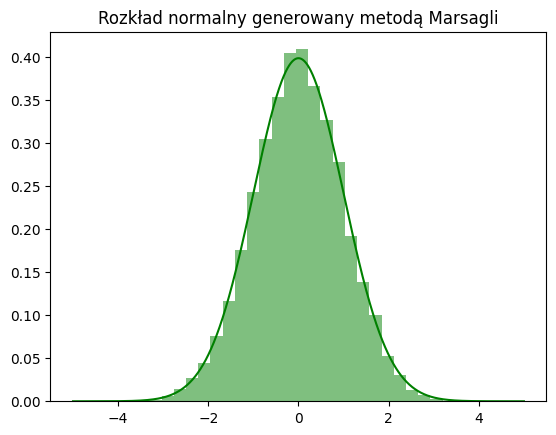

CPU times: total: 391 ms
Wall time: 688 ms


In [4]:
%%time


def marsagli(n: int = 10**3) -> typing.Tuple[np.ndarray, np.ndarray]:
    """Wygeneruj próbę z rozkładu normalnego standardowego za pomocą metody Marsagli.

    Parameters
    ----------
    n: int
        długość próby

    Returns:
    ----------
    array
        próba z rozkładu normalnego standardowego o długości n
    """

    z1 = np.zeros(n)
    z2 = np.zeros(n)
    count = 0
    while count < n:
        u = 2 * np.random.uniform(size=2) - 1
        s = u[0] ** 2 + u[1] ** 2

        if 0 < s < 1:
            z1[count] = u[0] * np.sqrt(-2 * np.log(s) / s)
            z2[count] = u[1] * np.sqrt(-2 * np.log(s) / s)
            count += 1

    return z1, z2


plt.hist(marsagli(10000)[0], bins=30, density=True, alpha=0.5, color="g")
plt.plot(xs, norm.pdf(xs), color="g")
plt.title("Rozkład normalny generowany metodą Marsagli")
plt.show()

### Metoda 3 - Tuzin

Metoda tuzin, nazywana także metodą sumy dwunastu zmiennych, polega na sumowaniu wielu niezależnych zmiennych losowych o rozkładzie jednostajnym. 

Algorytm ten opiera się na centralnym twierdzeniu granicznym, z którego wynika, że suma dużej liczby niezależnych zmiennych losowych o dowolnym rozkładzie zbiega w rozkładzie do rozkładu normalnego, gdy liczba tych zmiennych dąży do nieskończoności. Okazuje się, że dwanaście zmiennych jednostajnych jest wystarczające, aby uzyskać dobry przybliżenie rozkładu normalnego.

Metoda ta opisana jest następującymi krokami:

1. Wygeneruj 12 liczb z rozkładu jednostajnego $U(0,1)$
2. Oblicz $s$ poprzez zsumowanie wygenerowanych liczb
3. Zwróć $S - 6$



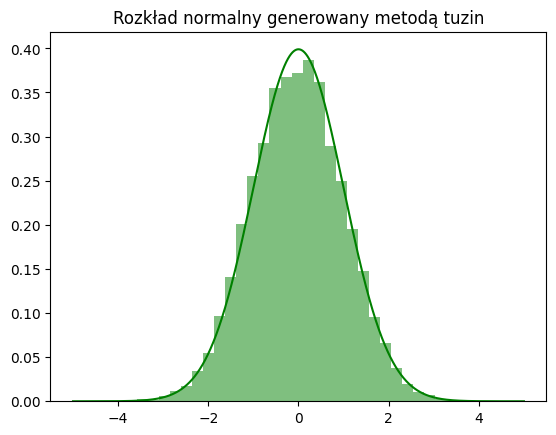

CPU times: total: 359 ms
Wall time: 652 ms


In [5]:
%%time


def tuzin(n: int = 10**3) -> np.ndarray:
    """Wygeneruj próbę z rozkładu normalnego standardowego za pomocą metody Boxa-Mullera.

    Parameters
    ----------
    n: int
        długość próby

    Returns:
    ----------
    array
        próba z rozkładu normalnego standardowego o długości n
    """

    result = np.zeros(n)

    for i in range(n):
        us = np.random.uniform(0, 1, 12)
        s = np.sum(us)
        result[i] = s - 6

    return result


plt.hist(tuzin(10000), bins=30, density=True, alpha=0.5, color="g")
plt.plot(xs, norm.pdf(xs), color="g")
plt.title("Rozkład normalny generowany metodą tuzin")
plt.show()

### Metoda 4 - Zigguratu

Metoda ta wykorzystuje funkcję wykładniczą oraz obliczenia stosunku powierzchni pod krzywą rozkładu normalnego do powierzchni prostokąta. Opiera się na idei "ziggurat", czyli strukturze przypominającej piramidę zbudowaną z prostokątnych bloków. Bloki te mają mieć powierzchnię proporcjonalną do obszaru pod krzywą rozkładu, dzięki czemu większość losowancyh punktów jest generowanych trafnie.

Metoda ta jest opisana następującymi krokami:

1. Inicjalizuj strukturę zigguratów - bloków proporcjonalnych do obszarów pod krzywą
2. Wylosuj indeks bloku
3. Wewnątrz wybranego bloku wygeneruj punkt (x, y) o rozkładzie jednostajnym
4. Jeśli punkt (x, y) znajduje się wewnątrz obszaru pod krzywą normalną, zwróć x. W przeciwnym razie wróć do 2.


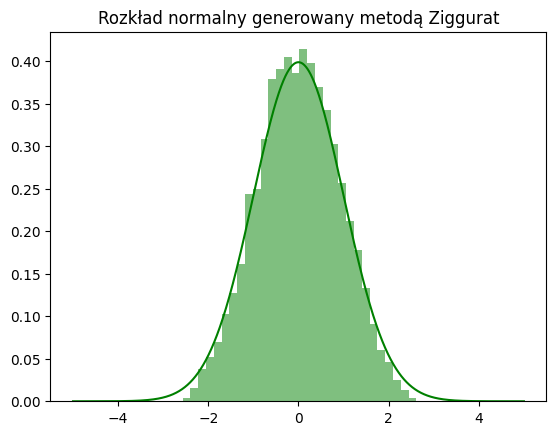

CPU times: total: 1.36 s
Wall time: 2.26 s


In [6]:
%%time


def f(x: float) -> float:
    """Oblicz wartość gęstości rozkładu normalnego

    Parameters:
    ----------
    x: float
        wartość punktu x dla którego chcemy obliczyć wartość gęstości

    Returns:
    ----------
    float
        obliczona wartość gęstości

    """
    return np.exp(-(x**2) / 2) / np.sqrt(2 * np.pi)


def ziggurat(size: int = 10**3, n: int = 256) -> typing.Tuple[np.ndarray, int]:
    """Wygeneruj próbę z rozkładu normalnego standardowego za pomocą metody Ziggurat.

    Parameters
    ----------
    size: int
        długość próby

    n: int
        ilość schodków w metodzie Ziggurat

    Returns:
    ----------
    list
        próba z rozkładu normalnego standardowego o długości n

    int
        ilość użycia funkcji wykładniczej (obsługa ogonu rozkładu normalnego)
    """

    result = np.zeros(size)

    A = 1.0 / n
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    count = 0

    x[0] = np.sqrt(2) * erfinv(1 - 2 * A)
    y[0] = f(x[0])

    for i in range(1, n):
        y[i] = y[i - 1] + A / x[i - 1]
        x[i] = np.sqrt(-2 * np.log(y[i] * np.sqrt(2 * np.pi)))

    y[n] = y[n - 1] + A / x[n - 1]
    x[n] = 0

    for s in range(size):
        while True:
            U0 = np.random.uniform(0, 1)
            U1 = np.random.uniform(0, 1)

            i = np.random.randint(0, len(x) - 1)

            x_candidate = U0 * x[i]
            sign = np.random.choice([-1, 1])

            if x_candidate < x[i + 1]:
                result[s] = sign * x_candidate
                break

            y_candidate = y[i] + U1 * (y[i + 1] - y[i])

            if i == n - 1:
                count += 1
                tail = -np.log(U0) / x[i]
                if U1 * f(tail) <= f(tail):
                    result[s] = sign * tail
                    break
            else:
                if y_candidate < f(x_candidate):
                    result[s] = sign * x_candidate
                    break

    return result, count


plt.hist(ziggurat(10000)[0], bins=30, density=True, alpha=0.5, color="g")
plt.plot(xs, norm.pdf(xs), color="g")
plt.title("Rozkład normalny generowany metodą Ziggurat")
plt.show()

Ze względu na charakterystykę działania algorytmu Ziggurat, wymaga on użycia algorytmu zapasowego dla ogonów w postaci rozkładu wykładniczego za pomocą metody Marsaglia. Poniżej przedstawiono wykres ilości użycia tej metody w zależności od ilości schodków w metodzie Ziggurat. Jak łatwo zauważyć, im więcej schodków w metodzie, tym rzadziej pojwaiała się konieczność użycia metody zapasowej dla ogonów rozkładu. Można więc wywnioskować, że większa liczba schodków lepiej aproksymuje rozkład docelowy, minimalizując obszar ogonów, dla których konieczny jest algorytm zapasowy, jednakże może to zarazem wydłużyć czas działania algorytmu.

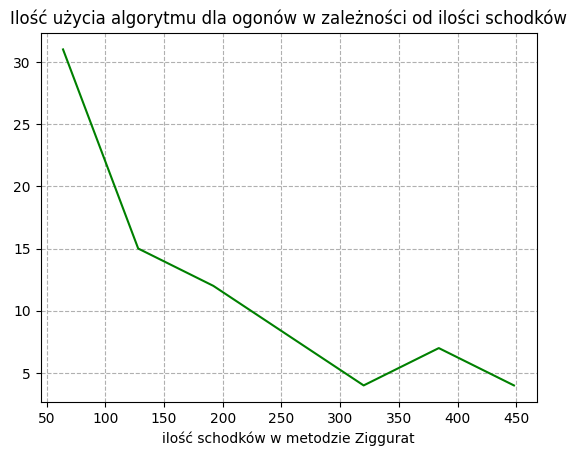

In [7]:
step_counts = np.arange(64, 512, 64)
tail_usage_counts = [ziggurat(n=n)[1] for n in step_counts]

plt.plot(step_counts, tail_usage_counts, color="g")
plt.xlabel("ilość schodków w metodzie Ziggurat")
plt.title("Ilość użycia algorytmu dla ogonów w zależności od ilości schodków")
plt.grid(True, linestyle="--")
plt.show()

## Kryteria testujące generatory

Aby porównać efektywność różnych metod generowania rozkładów normalnych powinniśmy zwrócić uwagę nie tylko na czas działania algorytmu, ale także na dokładność symulacji. Testowanie algorytmów polega na sprawdzeniu, czy wygenerowana próbka faktycznie odpowiada rozkładowi normalnemu standardowemu.

#### Kryterium 1:  charakterystyki rozkładu normalnego standaryzowanego 


In [8]:
def kryterium_1(
    method: typing.Callable[[float], float], n: int = 10**2, u: int = 10**2
) -> np.ndarray:
    """Przetestuj generator rozkładu normalnego metodą charakterystyki rozkładu normalnego standaryzowanego.

    Parameters
    ----------
    method: function
        wybrana metoda generowania rozkładu normalnego

    n: int
        długość generowanej próbki

    u: int
        liczba powtórzeń

    Returns:
    ----------
    list:
        wartość średniej charakterystyki dla generatora
    """
    S = np.zeros(4)
    m = 0
    s = 1
    mu3 = 0
    mu4 = 3

    for _ in range(u):
        sample = method(n)

        alpha1 = np.sum(sample) / n
        m2 = np.sum((sample - alpha1) ** 2) / n
        m3 = np.sum((sample - alpha1) ** 3) / n
        m4 = np.sum((sample - alpha1) ** 4) / n

        S[0] += np.abs(alpha1 - m)
        S[1] += np.abs(np.sqrt(m2) - s)
        S[2] += np.abs(m3 - mu3)
        S[3] += np.abs(m4 - mu4)

    return S / u

#### Kryterium 2: zgodność dystrybuant teoretycznej i empirycznej
Metoda ta polega na porównaniu dystrybuant teoretycznej i empirycznej. Teoretycznie można porównać ich przebieg na wykresie, jednak uniemożliwia to porównanie generatorów.Możemy więc skorzystać z miary:

$$ M = \sum_{i=1}^{n} | \phi(x_i) - F_i | $$

In [9]:
def kryterium_2(
    method: typing.Callable[[float], float], n: int = 10**2, u: int = 10**2
) -> float:
    """Przetestuj generator rozkładu normalnego metodą zgodności dystrybuant teoretycznej i empirycznej.

    Parameters
    ----------
    method: function
        wybrana metoda generowania rozkładu normalnego

    n: int
        długość generowanej próbki

    u: int
        liczba powtórzeń

    Returns:
    ----------
    float:
        wartość średniej charakterystyki dla generatora
    """

    result = np.zeros(u)

    for i in range(u):
        sample = np.sort(method(n))
        empirical_cdf = np.arange(1, n + 1) / n
        theoretical_cdf = norm.cdf(sample)
        result[i] = np.sum(np.abs(empirical_cdf - theoretical_cdf))

    return np.mean(result)

#### TESTOWANIE ALGORYTMÓW
#### Kryterium 1

In [10]:
print("wartość kryterium 1 dla algorytmu Boxa-Mullera: ", kryterium_1(box_muller))
print("wartość kryterium 1 dla algorytmu Marsagli: ", kryterium_1(marsagli))
print("wartość kryterium 1 dla algorytmu tuzin: ", kryterium_1(tuzin))

S = np.zeros(4)
m = 0
s = 1
mu3 = 0
mu4 = 3
n = 10**2
u = 10**2

for _ in range(u):
    sample = ziggurat(n)[0]

    alpha1 = np.sum(sample) / n
    m2 = np.sum((sample - alpha1) ** 2) / n
    m3 = np.sum((sample - alpha1) ** 3) / n
    m4 = np.sum((sample - alpha1) ** 4) / n

    S[0] += np.abs(alpha1 - m)
    S[1] += np.abs(np.sqrt(m2) - s)
    S[2] += np.abs(m3 - mu3)
    S[3] += np.abs(m4 - mu4)

print("Wartość kryterium 1 dla algorytmu Ziggurat: ", S / u)

wartość kryterium 1 dla algorytmu Boxa-Mullera:  [0.10832531 0.40419337 0.39355933 2.85887663]
wartość kryterium 1 dla algorytmu Marsagli:  [0.11628114 0.41146472 0.42579604 2.89873717]
wartość kryterium 1 dla algorytmu tuzin:  [0.07494765 0.05523464 0.17757061 0.66668583]
Wartość kryterium 1 dla algorytmu Ziggurat:  [0.08628004 0.08999593 0.12165997 1.16633922]


#### Kryterium 2

In [11]:
print("wartość kryterium 2 dla algorytmu Boxa-Mullera: ", kryterium_2(box_muller))
print("wartość kryterium 2 dla algorytmu Marsagli: ", kryterium_2(marsagli))
print("wartość kryterium 2 dla algorytmu tuzin: ", kryterium_2(tuzin))

u = 10**2
n = 10**2

result = np.zeros(u)

for i in range(u):
    sample = np.sort(ziggurat(n)[0])
    empirical_cdf = np.arange(1, n + 1) / n
    theoretical_cdf = norm.cdf(sample)
    result[i] = np.sum(np.abs(empirical_cdf - theoretical_cdf))

print("wartość kryterium 2 dla algorytmu Zigurat: ", np.mean(result))

wartość kryterium 2 dla algorytmu Boxa-Mullera:  6.411790499837116
wartość kryterium 2 dla algorytmu Marsagli:  6.136674697690155
wartość kryterium 2 dla algorytmu tuzin:  3.206467143688698
wartość kryterium 2 dla algorytmu Zigurat:  3.0738558349821608


Możemy więc zauważyć, że dla obu kryteriów najmniejsze wyniki uzyskały metody tuzin i Ziggurat. Różnice między oficjalnymi wynikami mogą wynikać ze zmniejszonej dokładności związanej ze zmniejszoną mocą obliczeniową. Poniżej zbadano średni czas działania poszczególnych funkcji generujących rozkład normalny:

In [12]:
def measure_time(func, repetitions=100):
    times = np.zeros(repetitions)
    for i in range(repetitions):
        start = time.time()
        func()
        end = time.time()
        times[i] = end - start
    return np.mean(times)

In [13]:
print("Średni czas dla metody Boxa-Mullera: ", measure_time(box_muller))
print("Średni czas dla metody Marsagli: ", measure_time(marsagli))
print("Średni czas dla metody Tuzin: ", measure_time(tuzin))
print("Średni czas dla metody Ziggurat: ", measure_time(ziggurat))

Średni czas dla metody Boxa-Mullera:  0.00029788970947265626


Średni czas dla metody Marsagli:  0.1047458815574646
Średni czas dla metody Tuzin:  0.042090659141540525
Średni czas dla metody Ziggurat:  0.2859360694885254


Widać więc, że metody, które uzyskały najlepsze wyniki w kwestii dokładności, są jednocześnie dużo bardziej czasochłonne.